# Neural Network for digit recognition of 4 and 9

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit as sigm

In [2]:
x_train = sio.loadmat('train_x_v7.mat')
y_train = sio.loadmat('train_y_v7.mat')
x_test = sio.loadmat('test_x_v7.mat')
y_test = sio.loadmat('test_y_v7.mat')

train_x = x_train['train_x']
train_y = y_train['train_y']
test_x = x_test['test_x']
test_y = y_test['test_y']

In [3]:
#parameters initialization
def parameters_init(): 
    W1 = np.random.randn(8, 784)
    b1 = np.random.randn(8, 1)
    W2 = np.random.randn(1, 8)
    b2 = np.random.randn(1, 1)
    return W1, b1, W2, b2

# sigmoid function
def sigmoid(X):
    return sigm(X)

# sigmoid derivative 
def sigmoid_der(X):
    return sigm(X)*(1-sigm(X))

# training loss
def training_loss(Y_hat, Y):
    t = (1/2)*((Y_hat.T-Y)**2)
    training_l = 1/512*np.sum(t)
    return training_l

# training accuracy
def training_accuracy(Y_hat,Y):
    q = predictions(Y_hat)
    training_acc = 1-1/512*np.sum(np.abs(q-Y.T))
    return training_acc

# testing loss
def testing_loss(Y_hat, Y):
    t = (1/2)*((Y_hat.T-Y)**2)
    testing_l = 1/128*np.sum(t)
    return testing_l

# testing accuracy
def testing_accuracy(Y_hat,Y):
    q = predictions(Y_hat)
    testing_acc = 1-1/128*np.sum(np.abs(q-Y.T))
    return testing_acc

# prediction
def predictions(Y_hat):
    pred = Y_hat.T
    p = []
    for i in range(len(pred)):
        if pred[i]>=0.5:
            q = 1
        else:
            q = 0
        p.append(q)
    return p


In [4]:
# forward propagation
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = W1@X + b1
    A1 = sigmoid(Z1)
    Y_hat = W2@A1 + b2
    return Z1, A1, Y_hat

# backward propagation
def backward_propagation(W1, b1, W2, b2, Z1, A1, Y_hat, X, Y, learning_rate = 0.001):

    dZ2 = Y_hat.T-Y   
    dZ1 = (np.matmul(dZ2,W2)).T*sigmoid_der(Z1)
    
    dW2 = np.matmul(dZ2.T,A1.T)
    db2 = np.mean(dZ2)

    dW1 = np.matmul(dZ1,X.T) 
    db1 = np.reshape(np.mean(dZ1, axis=1),(8,1))

    # update the weights and bias
    W1 = W1 - dW1*learning_rate
    b1 = b1 - db1*learning_rate
    W2 = W2 - dW2*learning_rate
    b2 = b2 - db2*learning_rate
    
    return W1, b1, W2, b2

In [5]:
np.random.seed(4)

train_accur = []
error_tr = []
test_accur = []
error_te = []
W1, b1, W2, b2 = parameters_init()

for epoch in range(80):
    # training set
    Z1, A1, Y_hat = forward_propagation(train_x, W1, b1, W2, b2)
    W1, b1, W2, b2 = backward_propagation(W1, b1, W2, b2, Z1, A1, Y_hat, train_x, train_y)
    
    train_l = training_loss(Y_hat, train_y)
    train_acc = training_accuracy(Y_hat,train_y)
    error_tr.append(np.average(train_l))
    train_accur.append(train_acc)
    
    #testing set
    _,_,yt_cap = forward_propagation(test_x, W1, b1, W2, b2)
    test_l = testing_loss(yt_cap, test_y)
    test_acc = testing_accuracy(yt_cap,test_y)
    error_te.append(np.average(test_l))
    test_accur.append(test_acc)
    
    if epoch % 10 == 0:
        print(f"Error at epoch {epoch} is {train_l:.5f} for training and {test_l:.5f} for testing")

Error at epoch 0 is 0.76001 for training and 0.46655 for testing
Error at epoch 10 is 0.19873 for training and 0.17528 for testing
Error at epoch 20 is 0.13875 for training and 0.14421 for testing
Error at epoch 30 is 0.11878 for training and 0.13400 for testing
Error at epoch 40 is 0.10867 for training and 0.12880 for testing
Error at epoch 50 is 0.10218 for training and 0.12549 for testing
Error at epoch 60 is 0.09751 for training and 0.12309 for testing
Error at epoch 70 is 0.09395 for training and 0.12119 for testing


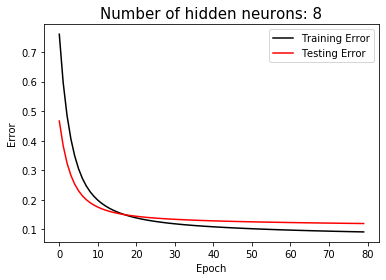

In [6]:
#plot error
plt.plot(error_tr, c = 'k')
plt.plot(error_te, c ='r')
plt.title('Number of hidden neurons: 8', fontsize = 15)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend(['Training Error', 'Testing Error'])
plt.show();

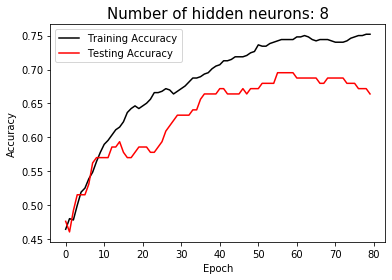

In [7]:
#plt accuracy
plt.plot(train_accur, c = 'k')
plt.plot(test_accur, c ='r')
plt.title('Number of hidden neurons: 8', fontsize = 15)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.show()

## New initialization parameters

In [8]:
#Q4
#parameters initialization
def parameters_init_Q4(): 
    W1 = np.random.randn(8, 784)*(1/28)
    b1 = np.random.randn(8, 1)*(1/28)
    W2 = np.random.randn(1, 8)*(1/np.sqrt(8))
    b2 = np.random.randn(1, 1)*(1/np.sqrt(8))    
    return W1, b1, W2, b2

In [9]:
train_accur_Q4 = []
error_tr_Q4 = []
test_accur_Q4 = []
error_te_Q4 = []
W1, b1, W2, b2 = parameters_init_Q4()

for epoch in range(80):
    # training set
    Z1, A1, Y_hat = forward_propagation(train_x, W1, b1, W2, b2)
    W1, b1, W2, b2 = backward_propagation(W1, b1, W2, b2, Z1, A1, Y_hat, train_x, train_y)
    
    train_l = training_loss(Y_hat, train_y)
    train_acc = training_accuracy(Y_hat,train_y)
    error_tr_Q4.append(np.average(train_l))
    train_accur_Q4.append(train_acc)
    
    #testing set
    _,_,yt_cap = forward_propagation(test_x, W1, b1, W2, b2)
    test_l = testing_loss(yt_cap, test_y)
    test_acc = testing_accuracy(yt_cap,test_y)
    error_te_Q4.append(np.average(test_l))
    test_accur_Q4.append(test_acc)
    
    if epoch % 10 == 0:
        print(f"Error at epoch {epoch} is {train_l:.5f} for training and {test_l:.5f} for testing")

Error at epoch 0 is 0.34018 for training and 0.89166 for testing
Error at epoch 10 is 0.09906 for training and 0.09765 for testing
Error at epoch 20 is 0.05399 for training and 0.05767 for testing
Error at epoch 30 is 0.03416 for training and 0.04047 for testing
Error at epoch 40 is 0.02631 for training and 0.03362 for testing
Error at epoch 50 is 0.02283 for training and 0.03072 for testing
Error at epoch 60 is 0.02095 for training and 0.02936 for testing
Error at epoch 70 is 0.01968 for training and 0.02860 for testing


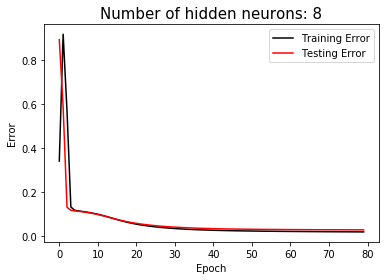

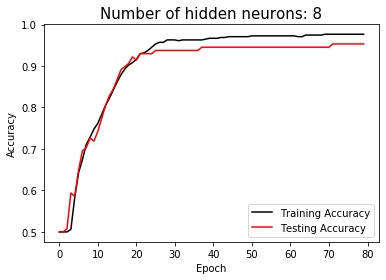

In [10]:
# plot error
plt.plot(error_tr_Q4, c = 'k')
plt.plot(error_te_Q4, c ='r')
plt.title('Number of hidden neurons: 8', fontsize = 15)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend(['Training Error', 'Testing Error'])
plt.show();

#plot accuracy
plt.plot(train_accur_Q4, c = 'k')
plt.plot(test_accur_Q4, c ='r')
plt.title('Number of hidden neurons: 8', fontsize = 15)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.show()

## 4 neurons

In [11]:
def backward_propagation_Q54(W1, b1, W2, b2, Z1, A1, Y_hat, X, Y, learning_rate = 0.001):

    dZ2 = Y_hat.T-Y   
    dZ1 = (np.matmul(dZ2,W2)).T*sigmoid_der(Z1)
    
    dW2 = np.matmul(dZ2.T,A1.T)
    db2 = np.mean(dZ2)

    dW1 = np.matmul(dZ1,X.T) 
    db1 = np.reshape(np.mean(dZ1, axis=1),(4,1))

    # update the weights and bias
    W1 = W1 - dW1*learning_rate
    b1 = b1 - db1*learning_rate
    W2 = W2 - dW2*learning_rate
    b2 = b2 - db2*learning_rate
    
    return W1, b1, W2, b2

In [12]:
#Q5 4 neurons
def parameters_init_Q54(): 
    W1 = np.random.randn(4, 784)
    b1 = np.random.randn(4, 1)
    W2 = np.random.randn(1, 4)
    b2 = np.random.randn(1, 1)    
    return W1, b1, W2, b2

In [13]:
train_accur_Q54 = []
error_tr_Q54 = []
test_accur_Q54 = []
error_te_Q54 = []
W1, b1, W2, b2 = parameters_init_Q54()

for epoch in range(80):
    # training set
    Z1, A1, Y_hat = forward_propagation(train_x, W1, b1, W2, b2)
    W1, b1, W2, b2 = backward_propagation_Q54(W1, b1, W2, b2, Z1, A1, Y_hat, train_x, train_y)
    
    train_l = training_loss(Y_hat, train_y)
    train_acc = training_accuracy(Y_hat,train_y)
    error_tr_Q54.append(np.average(train_l))
    train_accur_Q54.append(train_acc)
    
    #testing set
    _,_,yt_cap = forward_propagation(test_x, W1, b1, W2, b2)
    test_l = testing_loss(yt_cap, test_y)
    test_acc = testing_accuracy(yt_cap,test_y)
    error_te_Q54.append(np.average(test_l))
    test_accur_Q54.append(test_acc)
    
    if epoch % 10 == 0:
        print(f"Error at epoch {epoch} is {train_l:.5f} for training and {test_l:.5f} for testing")

Error at epoch 0 is 1.07503 for training and 0.27068 for testing
Error at epoch 10 is 0.15558 for training and 0.14386 for testing
Error at epoch 20 is 0.13215 for training and 0.12049 for testing
Error at epoch 30 is 0.12143 for training and 0.11038 for testing
Error at epoch 40 is 0.11436 for training and 0.10469 for testing
Error at epoch 50 is 0.10905 for training and 0.10105 for testing
Error at epoch 60 is 0.10480 for training and 0.09845 for testing
Error at epoch 70 is 0.10124 for training and 0.09638 for testing


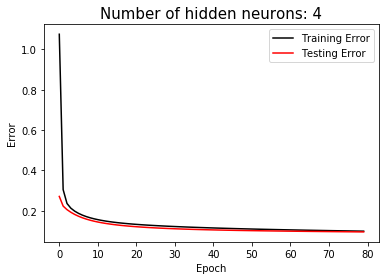

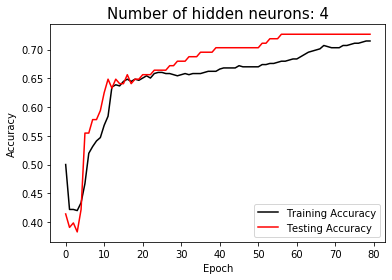

In [14]:
# plot error
plt.plot(error_tr_Q54, c = 'k')
plt.plot(error_te_Q54, c ='r')
plt.title('Number of hidden neurons: 4', fontsize = 15)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend(['Training Error', 'Testing Error'])
plt.show();

#plot accuracy
plt.plot(train_accur_Q54, c = 'k')
plt.plot(test_accur_Q54, c ='r')
plt.title('Number of hidden neurons: 4', fontsize = 15)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.show()

### 12 neurons

In [15]:
def backward_propagation_Q512(W1, b1, W2, b2, Z1, A1, Y_hat, X, Y, learning_rate = 0.001):

    dZ2 = Y_hat.T-Y   
    dZ1 = (np.matmul(dZ2,W2)).T*sigmoid_der(Z1)
    
    dW2 = np.matmul(dZ2.T,A1.T)
    db2 = np.mean(dZ2)

    dW1 = np.matmul(dZ1,X.T) 
    db1 = np.reshape(np.mean(dZ1, axis=1),(12,1))

    # update the weights and bias
    W1 = W1 - dW1*learning_rate
    b1 = b1 - db1*learning_rate
    W2 = W2 - dW2*learning_rate
    b2 = b2 - db2*learning_rate
    
    return W1, b1, W2, b2

In [16]:
#Q5 12 neurons
def parameters_init_Q512(): 
    W1 = np.random.randn(12, 784)
    b1 = np.random.randn(12, 1)
    W2 = np.random.randn(1, 12)
    b2 = np.random.randn(1, 1)   
    return W1, b1, W2, b2

In [17]:
train_accur_Q512 = []
error_tr_Q512 = []
test_accur_Q512 = []
error_te_Q512 = []
W1, b1, W2, b2 = parameters_init_Q512()

for epoch in range(80):
    # training set
    Z1, A1, Y_hat = forward_propagation(train_x, W1, b1, W2, b2)
    W1, b1, W2, b2 = backward_propagation_Q512(W1, b1, W2, b2, Z1, A1, Y_hat, train_x, train_y)
    
    train_l = training_loss(Y_hat, train_y)
    train_acc = training_accuracy(Y_hat,train_y)
    error_tr_Q512.append(np.average(train_l))
    train_accur_Q512.append(train_acc)
    
    #testing set
    _,_,yt_cap = forward_propagation(test_x, W1, b1, W2, b2)
    test_l = testing_loss(yt_cap, test_y)
    test_acc = testing_accuracy(yt_cap,test_y)
    error_te_Q512.append(np.average(test_l))
    test_accur_Q512.append(test_acc)
    
    if epoch % 10 == 0:
        print(f"Error at epoch {epoch} is {train_l:.5f} for training and {test_l:.5f} for testing")

Error at epoch 0 is 3.96493 for training and 10.15369 for testing
Error at epoch 10 is 0.25493 for training and 0.21273 for testing
Error at epoch 20 is 0.14551 for training and 0.15784 for testing
Error at epoch 30 is 0.12121 for training and 0.14107 for testing
Error at epoch 40 is 0.11124 for training and 0.13093 for testing
Error at epoch 50 is 0.10532 for training and 0.12475 for testing
Error at epoch 60 is 0.10078 for training and 0.12045 for testing
Error at epoch 70 is 0.09675 for training and 0.11700 for testing


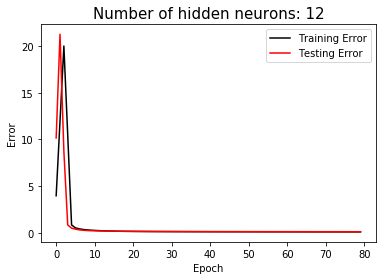

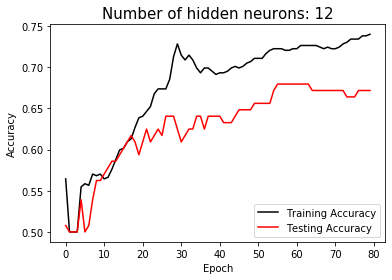

In [18]:
# plot error
plt.plot(error_tr_Q512, c = 'k')
plt.plot(error_te_Q512, c ='r')
plt.title('Number of hidden neurons: 12', fontsize = 15)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend(['Training Error', 'Testing Error'])
plt.show();

#plot accuracy
plt.plot(train_accur_Q512, c = 'k')
plt.plot(test_accur_Q512, c ='r')
plt.title('Number of hidden neurons: 12', fontsize = 15)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.show()